In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [54]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                    names=["sepal length in cm", "sepal width in cm","petal length in cm", "petal width in cm","class"])

In [55]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
data.shape

(150, 5)

In [57]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 1, Iris-versicolor correspond to 2 and Iris-virginica correspond to 3.

In [91]:
data['class']=data['class'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [92]:
chi2_contingency(pd.crosstab(data['class'], data['sepal length in cm']))

(156.26666666666668,
 6.665987344005466e-09,
 68,
 array([[0.33333333, 1.        , 0.33333333, 1.33333333, 0.66666667,
         1.66666667, 2.        , 3.33333333, 3.        , 1.33333333,
         0.33333333, 2.        , 2.33333333, 2.        , 2.66666667,
         2.33333333, 1.        , 2.        , 2.        , 1.33333333,
         3.        , 2.33333333, 1.66666667, 0.66666667, 2.66666667,
         1.        , 1.33333333, 0.33333333, 0.33333333, 1.        ,
         0.33333333, 0.33333333, 0.33333333, 1.33333333, 0.33333333],
        [0.33333333, 1.        , 0.33333333, 1.33333333, 0.66666667,
         1.66666667, 2.        , 3.33333333, 3.        , 1.33333333,
         0.33333333, 2.        , 2.33333333, 2.        , 2.66666667,
         2.33333333, 1.        , 2.        , 2.        , 1.33333333,
         3.        , 2.33333333, 1.66666667, 0.66666667, 2.66666667,
         1.        , 1.33333333, 0.33333333, 0.33333333, 1.        ,
         0.33333333, 0.33333333, 0.33333333, 1.33333

In [93]:
chi2_contingency(pd.crosstab(data['class'], data['sepal width in cm']))

(88.36446886446886,
 8.303947787862062e-05,
 44,
 array([[0.33333333, 1.        , 1.33333333, 1.        , 2.66666667,
         1.66666667, 3.        , 4.66666667, 3.33333333, 8.66666667,
         4.        , 4.33333333, 2.        , 4.        , 2.        ,
         1.        , 1.        , 2.        , 0.66666667, 0.33333333,
         0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 1.        , 1.33333333, 1.        , 2.66666667,
         1.66666667, 3.        , 4.66666667, 3.33333333, 8.66666667,
         4.        , 4.33333333, 2.        , 4.        , 2.        ,
         1.        , 1.        , 2.        , 0.66666667, 0.33333333,
         0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 1.        , 1.33333333, 1.        , 2.66666667,
         1.66666667, 3.        , 4.66666667, 3.33333333, 8.66666667,
         4.        , 4.33333333, 2.        , 4.        , 2.        ,
         1.        , 1.        , 2.        , 0.66666667, 0.33333333,
         0.33333333, 0.33333333

In [94]:
chi2_contingency(pd.crosstab(data['class'], data['petal length in cm']))

(271.79999999999995,
 1.1775672327529825e-21,
 84,
 array([[0.33333333, 0.33333333, 0.66666667, 2.33333333, 4.        ,
         4.66666667, 2.33333333, 1.33333333, 0.66666667, 0.33333333,
         0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.33333333,
         1.        , 1.66666667, 1.        , 1.33333333, 0.66666667,
         1.33333333, 2.66666667, 1.        , 1.66666667, 1.33333333,
         1.66666667, 1.33333333, 2.66666667, 0.66666667, 0.66666667,
         0.66666667, 1.        , 2.        , 1.        , 1.        ,
         0.66666667, 0.66666667, 1.        , 0.33333333, 0.33333333,
         0.33333333, 0.66666667, 0.33333333],
        [0.33333333, 0.33333333, 0.66666667, 2.33333333, 4.        ,
         4.66666667, 2.33333333, 1.33333333, 0.66666667, 0.33333333,
         0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.33333333,
         1.        , 1.66666667, 1.        , 1.33333333, 0.66666667,
         1.33333333, 2.66666667, 1.        , 1.66666667, 1.33333333,
      

In [95]:
chi2_contingency(pd.crosstab(data['class'], data['petal width in cm']))

(271.75,
 2.1648103108815957e-35,
 42,
 array([[2.        , 9.33333333, 2.33333333, 2.33333333, 0.33333333,
         0.33333333, 2.33333333, 1.        , 1.66666667, 4.33333333,
         2.66666667, 4.        , 1.33333333, 0.66666667, 4.        ,
         1.66666667, 2.        , 2.        , 1.        , 2.66666667,
         1.        , 1.        ],
        [2.        , 9.33333333, 2.33333333, 2.33333333, 0.33333333,
         0.33333333, 2.33333333, 1.        , 1.66666667, 4.33333333,
         2.66666667, 4.        , 1.33333333, 0.66666667, 4.        ,
         1.66666667, 2.        , 2.        , 1.        , 2.66666667,
         1.        , 1.        ],
        [2.        , 9.33333333, 2.33333333, 2.33333333, 0.33333333,
         0.33333333, 2.33333333, 1.        , 1.66666667, 4.33333333,
         2.66666667, 4.        , 1.33333333, 0.66666667, 4.        ,
         1.66666667, 2.        , 2.        , 1.        , 2.66666667,
         1.        , 1.        ]]))

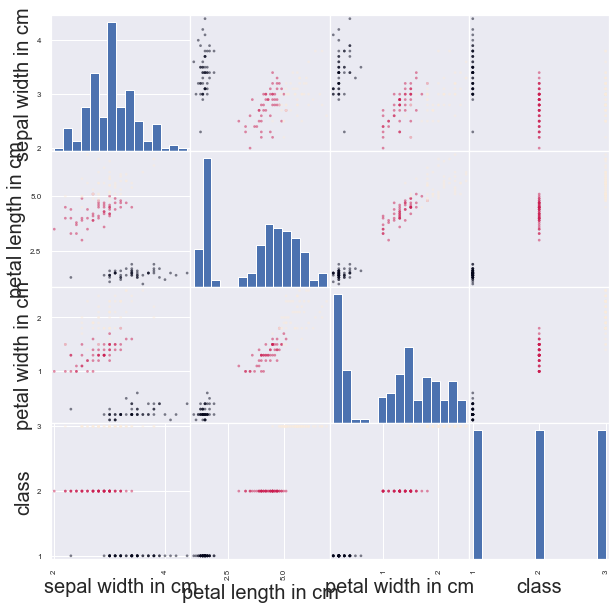

In [97]:
X = data.iloc[:,1:]
Y = data['class']
scatter = pd.plotting.scatter_matrix(X, c= Y, marker = '.', s=30, hist_kwds={'bins':15}, figsize=(10,10))
#y labels
temp1=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in scatter.ravel()]
#x labels
temp2=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in scatter.ravel()]

/Users/bhuvanavenkatappa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

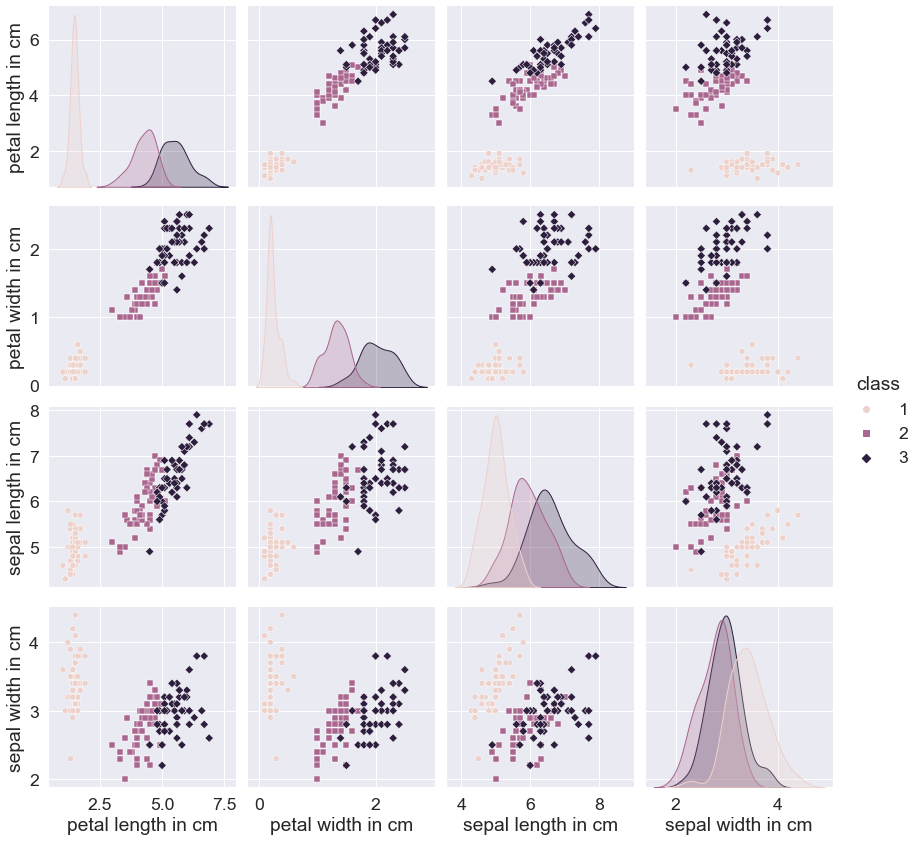

In [99]:
plt.figure()
sns.pairplot(data[["petal length in cm", "petal width in cm", "sepal length in cm", "sepal width in cm", "class"]], hue = "class", size=3, markers=["o", "s", "D"])
plt.show()

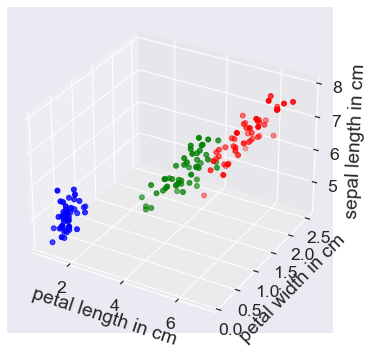

In [132]:
import matplotlib.colors as mcol
cmap = mcol.ListedColormap(["blue","green","red"])

fig = plt.figure(figsize=(6,6) )
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    X['petal length in cm'], X['petal width in cm'], X['sepal length in cm'], 
    c = Y, cmap=cmap, marker = '.', s=100
    )
ax.set_xlabel('petal length in cm')
ax.set_ylabel('petal width in cm')
ax.set_zlabel('sepal length in cm')
plt.show()

In [135]:
features = data.columns[-3:-1].tolist()
features

['petal length in cm', 'petal width in cm']

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [136]:
X = data[['petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm']]
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [137]:
X_train.head()

,petal length in cm,petal width in cm,sepal length in cm,sepal width in cm
137,5.5,1.8,6.4,3.1
84,4.5,1.5,5.4,3.0
27,1.5,0.2,5.2,3.5
127,4.9,1.8,6.1,3.0
132,5.6,2.2,6.4,2.8


In [138]:
X_train.shape

(120, 4)

In [139]:
Y_train.shape

(120,)

In [140]:
X_test

,petal length in cm,petal width in cm,sepal length in cm,sepal width in cm
114,5.1,2.4,5.8,2.8
62,4.0,1.0,6.0,2.2
33,1.4,0.2,5.5,4.2
107,6.3,1.8,7.3,2.9
7,1.5,0.2,5.0,3.4
100,6.0,2.5,6.3,3.3
40,1.3,0.3,5.0,3.5
86,4.7,1.5,6.7,3.1
76,4.8,1.4,6.8,2.8
71,4.0,1.3,6.1,2.8


In [141]:
X.head()

,petal length in cm,petal width in cm,sepal length in cm,sepal width in cm
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [142]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [157]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 


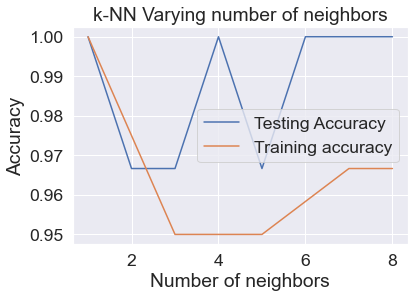

In [158]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [159]:
knn = KNeighborsClassifier(n_neighbors=7)

In [160]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [145]:
sample_test = X_test.iloc[0,:]
sample_test

petal length in cm    5.1
petal width in cm     2.4
sepal length in cm    5.8
sepal width in cm     2.8
Name: 114, dtype: float64

In [161]:
knn.score(X_train, Y_train)

0.9666666666666667

In [162]:
knn.score(X_test, Y_test)

1.0

In [169]:
Y_train_pred = knn.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

0.9666666666666667

In [170]:
Y_test_pred = knn.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

1.0

<AxesSubplot:>

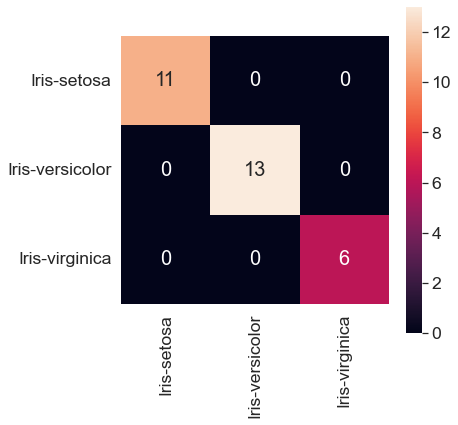

In [171]:
cm = confusion_matrix(Y_test, Y_test_pred)
df_cm = pd.DataFrame(cm, index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.figure(figsize = (6,6))
sns.set(font_scale=1.6)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)

<AxesSubplot:>

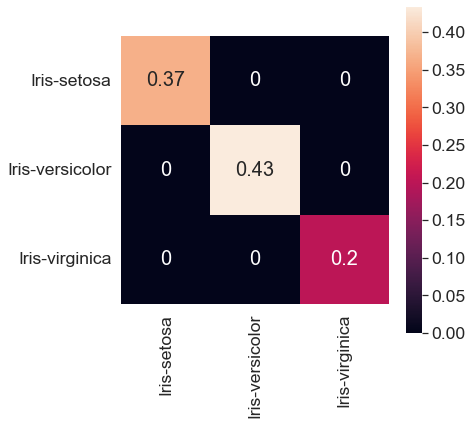

In [172]:
df_cm = pd.DataFrame(cm/Y_test.shape[0], index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.figure(figsize = (6,6))
sns.set(font_scale=1.6)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)

 ##Performing Feature normalization: scaling the feature in the range of 0 to 1

In [180]:
X = data[['petal length in cm', 'petal width in cm']]
Y = data['class']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 7)
# train the KNN classifier
knn.fit(X_train, Y_train)
# test the KNN classifier
acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

training accuracy= 0.9583333333333334
testing accuracy= 1.0


In [181]:
#using MinMaxscaler for scaling the features
X = data[['petal length in cm', 'petal width in cm']]
Y = data['class']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# build a KNN classifier    
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 7)
# train the KNN classifier
knn.fit(X_train, Y_train)

acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)    
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

training accuracy= 0.9666666666666667
testing accuracy= 0.9666666666666667


In [182]:
X = data[['petal length in cm', 'petal width in cm','sepal length in cm','sepal width in cm']]
Y = data['class']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# build a KNN classifier    
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 7)
# train the KNN classifier
knn.fit(X_train, Y_train)

acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)    
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

training accuracy= 0.9583333333333334
testing accuracy= 1.0


Ploting decision boundaries to visualize the classification result

/Users/bhuvanavenkatappa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/var/folders/8k/1knn1hln20j8lm_mcv4jv_0w0000gn/T/ipykernel_95625/2844939395.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(xx, yy, Z,cmap='viridis')
/var/folders/8k/1knn1hln20j8lm_mcv4jv_0w0000gn/T/ipykernel_95625/2844939395.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sc, cmap='viridis', ticks=[1, 2, 3])


[Text(1, 1, 'Iris-setosa'),
 Text(1, 2, 'Iris-versicolor'),
 Text(1, 3, 'Iris-virginica')]

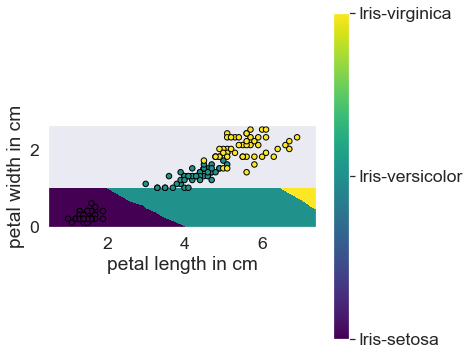

In [184]:
#Let's consider the features that are most likely co-related with the result/dependent variable
X = data[['petal length in cm', 'petal width in cm']]
Y = data['class']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 7)
# train the KNN classifier
knn.fit(X_train, Y_train)
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X['petal length in cm'].min() - .5, X['petal length in cm'].max() + .5
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx_r=xx.reshape(xx.shape[0]*xx.shape[1],1)
yy_r=yy.reshape(yy.shape[0]*yy.shape[1],1)
xx_yy = np.concatenate([xx_r, yy_r], axis=1)
xx_yy = scaler.transform(xx_yy)
Z = knn.predict(xx_yy)
Z = Z.reshape(xx.shape)
# Put the result into a color plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolormesh(xx, yy, Z,cmap='viridis')
sc=ax.scatter(X['petal length in cm'], X['petal width in cm'],c=Y,cmap='viridis', 
              marker='o',edgecolor = 'black', s=30)
ax.set_xlabel('petal length in cm')
ax.set_ylabel('petal width in cm')
ax.set_aspect('equal')
cbar = fig.colorbar(sc, cmap='viridis', ticks=[1, 2, 3])
cbar.ax.set_yticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [185]:
#printing out the classification report which is one of the features in Scikit-learn
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [189]:
#Performing Cross Validation
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [190]:
#In case of classifier like knn the parameter to be tuned is n_neighbors.Hence let's consider n_neighbors.
param_grid = {'n_neighbors':np.arange(1,50)}

In [191]:
#passing our knn classifier under GridSearchCV
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [192]:
knn_cv.best_score_

0.9666666666666668

In [193]:
knn_cv.best_params_

{'n_neighbors': 4}

In [ ]:
#Thus a knn classifier with number of neighbors as 4 achieves the best score/accuracy of 0.9666668 i.e about 97%